In [ ]:
from tqdm import tqdm
import json
import matplotlib.pyplot as plt

from game import Game
from player import Player, RandomPlayer, MaxPlayer, MinPlayer, NNPlayer, BonusCravingPlayer, MalusAdverse, GetRidOfBadCards, MCPlayer

from analyse import read_game, plot_win_over_time

In [ ]:
n_player = 7
n_game = 5000
n_cards = 5
game = Game(n_player, n_cards, n_game=n_game, random=True, verbose=False)
## Example de remplacement des joueurs:
game.player_list_[0] = MaxPlayer("MaxPlayer", n_cards)
game.player_list_[1] = RandomPlayer("RandomPlayer", n_cards)
game.player_list_[2] = BonusCravingPlayer("BonusCravingPlayer", n_cards)
game.player_list_[3] = MalusAdverse("MalusAdverse", n_cards)
game.player_list_[4] = GetRidOfBadCards("GetRidOfBadCards", n_cards)
game.player_list_[5] = NNPlayer(name="NNPlayer", n_cards = n_cards,learning_rate=1e-12,n_player=n_player)
game.player_list_[6] = MinPlayer("MinPlayer", n_cards)

# (self, name: str, weights=None, learning_rate=0.5, n_player=2)
# (self, name: str,n_cards: int=5)
game_summary_list = []
winner_list_list = []
for _ in tqdm(range(n_game)):
    player_list, game_summary, winner_list = game.play()
    game_summary_list.append(game_summary)
    winner_list_list.append(list(map(str, winner_list)))
with open(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_example.json", "w+") as f:
    json.dump(
        {
            "player_list": list(map(str, player_list)),
            "game_summary_list": game_summary_list,
            "winner_list_list": winner_list_list,
        },
        f,
        indent=4,
    )

100%|██████████| 5000/5000 [00:40<00:00, 123.03it/s]


In [ ]:
player_list_nn, df_game_nn = read_game(f"../data/game_summary/summary_{n_player}p_{n_game}g_{n_cards}c_example.json", return_player=True)

Number of games: 5000


In [ ]:
player_list_nn

['MaxPlayer MaxPlayer',
 'RandomPlayer RandomPlayer',
 'BonusCravingPlayer BonusCravingPlayer',
 'MalusAdverse MalusAdverse',
 'GetRidOfBadCards GetRidOfBadCards',
 'NN Player NNPlayer',
 'MinPlayer MinPlayer']

/work/StupideVautour/implementation/analyse.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["game_winner"] = df_clean["game_winner"].apply(lambda x: x[0])
Number of games in df_game: 5000
Number of games with a unique winner: 4620


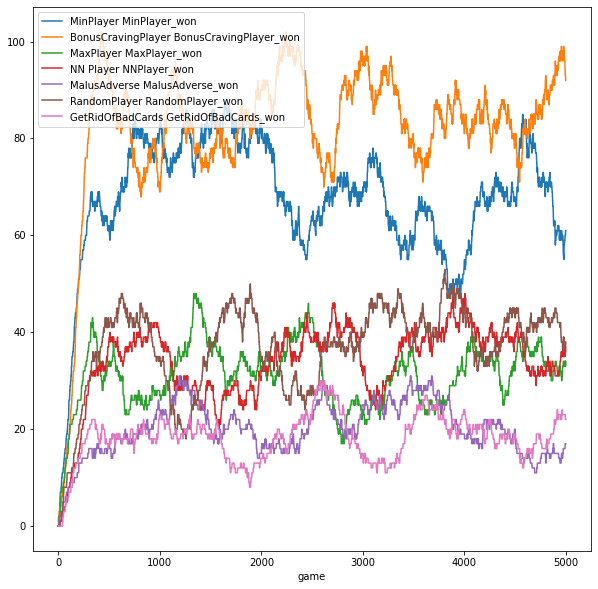

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
df_win = plot_win_over_time(df_game_nn, player_list=player_list_nn, window=300, fig=fig, ax=ax)

<AxesSubplot:xlabel='game'>

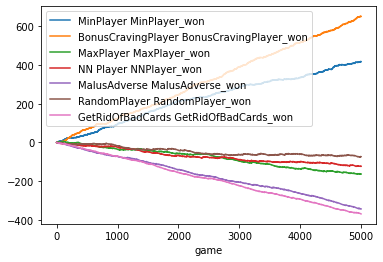

In [ ]:
df_reward = df_win.drop(columns=["game_winner"]).astype(int)
df_reward = df_reward - 1/df_reward.shape[1]
df_reward.cumsum().plot()

In [ ]:
df_reward.sum().sum()

1.4210854715202004e-12

In [ ]:
game = Game(n_player, n_cards, n_game=n_game, random=False, verbose=False)

KeyboardInterrupt: Interrupted by user

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3570100-157e-4a3f-b5c9-ebc0870008b3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>